# This is an explatory data analysis for grain demand globally

Grains are the world's most staple food. However, grains are produced on a seasonal basis in most regions in the wold. Grains are also consumed all year long with fairly stable demand. The exploratory data analyis conducted in this notebook is therefore important for farmers, consumers, and other stakeholders. 

In [1]:
#import the libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px



In [2]:
#import the data

grain_df= pd.read_csv(r"C:\Users\Administrator\Downloads\GrainDemandProduction.csv")
grain_df.head()

,Dataset,Element,Region,Sub-region,Year,Millions of metric tons
0,"Grain food demand, other demand, total demand,...",Food grain demand,Asia,East Asia,2024,5.5
1,"Grain food demand, other demand, total demand,...",Other grain demand,Asia,East Asia,2024,1.3
2,"Grain food demand, other demand, total demand,...",Grain production,Asia,East Asia,2024,4.7
3,"Grain food demand, other demand, total demand,...",Implied additional supply required,Asia,East Asia,2024,2.1
4,"Grain food demand, other demand, total demand,...",Total grain demand,Asia,East Asia,2024,6.8


In [3]:
#checking the information contained in the dataset

grain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dataset                  190 non-null    object 
 1   Element                  190 non-null    object 
 2   Region                   190 non-null    object 
 3   Sub-region               190 non-null    object 
 4   Year                     190 non-null    int64  
 5   Millions of metric tons  190 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.0+ KB


In [4]:
#checking the unique features in each colum

grain_df.nunique()

Dataset                      1
Element                      5
Region                       6
Sub-region                  19
Year                         2
Millions of metric tons    168
dtype: int64

In [5]:
#dropping the Dataset column

grain_df= grain_df.drop(["Dataset"], axis=1)


In [6]:
grain_df.head()

,Element,Region,Sub-region,Year,Millions of metric tons
0,Food grain demand,Asia,East Asia,2024,5.5
1,Other grain demand,Asia,East Asia,2024,1.3
2,Grain production,Asia,East Asia,2024,4.7
3,Implied additional supply required,Asia,East Asia,2024,2.1
4,Total grain demand,Asia,East Asia,2024,6.8


In [7]:
# setting the index

#grain_df.set_index("Region", inplace=True)

grain_df.head()



,Element,Region,Sub-region,Year,Millions of metric tons
0,Food grain demand,Asia,East Asia,2024,5.5
1,Other grain demand,Asia,East Asia,2024,1.3
2,Grain production,Asia,East Asia,2024,4.7
3,Implied additional supply required,Asia,East Asia,2024,2.1
4,Total grain demand,Asia,East Asia,2024,6.8


In [8]:
grain_df.groupby('Region').value_counts()

grain_df.groupby('Element')

grain_df.head(10)

,Element,Region,Sub-region,Year,Millions of metric tons
0,Food grain demand,Asia,East Asia,2024,5.5
1,Other grain demand,Asia,East Asia,2024,1.3
2,Grain production,Asia,East Asia,2024,4.7
3,Implied additional supply required,Asia,East Asia,2024,2.1
4,Total grain demand,Asia,East Asia,2024,6.8
5,Food grain demand,Asia,South Asia,2024,357.0
6,Other grain demand,Asia,South Asia,2024,79.9
7,Grain production,Asia,South Asia,2024,434.2
8,Implied additional supply required,Asia,South Asia,2024,2.7
9,Total grain demand,Asia,South Asia,2024,436.9


In [9]:
#creating a filter for food grain demand for the year 2024

food_grain_df= grain_df["Element"].str.contains("Food") & (grain_df["Year"]==2024)

mask= grain_df[food_grain_df]

mask

,Element,Region,Sub-region,Year,Millions of metric tons
0,Food grain demand,Asia,East Asia,2024,5.5
5,Food grain demand,Asia,South Asia,2024,357.0
10,Food grain demand,Asia,South East Asia,2024,142.1
15,Food grain demand,Former Soviet Union,Former Soviet Union,2024,20.8
20,Food grain demand,Latin America and the Caribbean,Caribbean,2024,3.4
25,Food grain demand,Latin America and the Caribbean,Central America,2024,6.1
30,Food grain demand,Latin America and the Caribbean,South America,2024,16.7
35,Food grain demand,Middle East and North Africa,Middle East,2024,29.5
40,Food grain demand,Middle East and North Africa,North Africa,2024,49.9
45,Food grain demand,Sub-Saharan Africa,Central Africa,2024,14.2


In [10]:
food_grain_mask=mask.groupby("Region").sum().sort_values(by="Millions of metric tons", ascending=False)

food_grain_mask

,Element,Sub-region,Year,Millions of metric tons
Region,,,,
Asia,Food grain demandFood grain demandFood grain d...,"East AsiaSouth AsiaSouth East AsiaAsia, Total",8096,1009.2
IFSA countries,Food grain demand,"IFSA countries, Total",2024,800.2
Sub-Saharan Africa,Food grain demandFood grain demandFood grain d...,Central AfricaEast AfricaSouthern AfricaWest A...,10120,338.5
Middle East and North Africa,Food grain demandFood grain demandFood grain d...,Middle EastNorth AfricaMiddle East and North A...,6072,158.7
Latin America and the Caribbean,Food grain demandFood grain demandFood grain d...,CaribbeanCentral AmericaSouth AmericaLatin Ame...,8096,52.4
Former Soviet Union,Food grain demandFood grain demand,"Former Soviet UnionFormer Soviet Union, Total",4048,41.6


Text(0, 0.5, 'Millions of Metric tons')

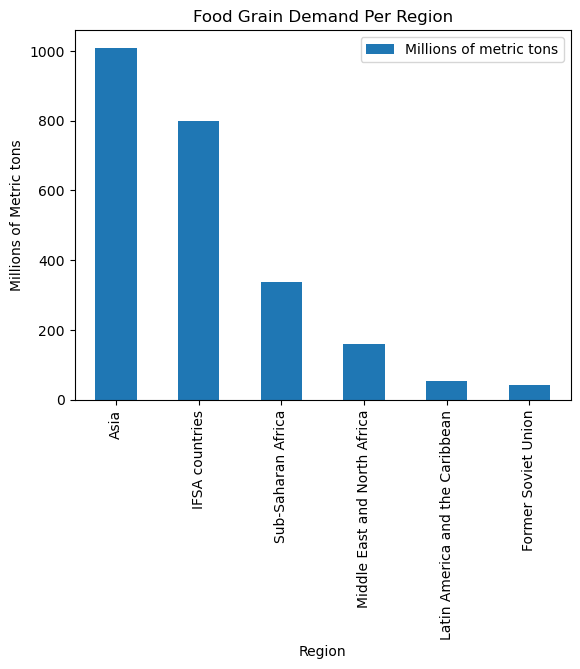

In [11]:
#Visualising the above information in a more readable format

food_grain_mask.plot(y="Millions of metric tons", kind="bar")

plt.title("Food Grain Demand Per Region")

plt.xlabel("Region")

plt.ylabel("Millions of Metric tons")

In [15]:
#other grain demand 
grain_df.head()

other_grain_demand_df= grain_df["Element"].str.contains("Other") & (grain_df["Year"]==2024)

mask_other= grain_df[other_grain_demand_df]

mask_other= mask_other.groupby("Region").sum ().sort_values(by= "Millions of metric tons", ascending=False)

mask_other.head()

,Element,Sub-region,Year,Millions of metric tons
Region,,,,
IFSA countries,Other grain demand,"IFSA countries, Total",2024,286.6
Asia,Other grain demandOther grain demandOther grai...,"East AsiaSouth AsiaSouth East AsiaAsia, Total",8096,275.2
Middle East and North Africa,Other grain demandOther grain demandOther grai...,Middle EastNorth AfricaMiddle East and North A...,6072,111.0
Sub-Saharan Africa,Other grain demandOther grain demandOther grai...,Central AfricaEast AfricaSouthern AfricaWest A...,10120,75.6
Former Soviet Union,Other grain demandOther grain demand,"Former Soviet UnionFormer Soviet Union, Total",4048,62.2


Text(0, 0.5, 'Millions of Metric tons')

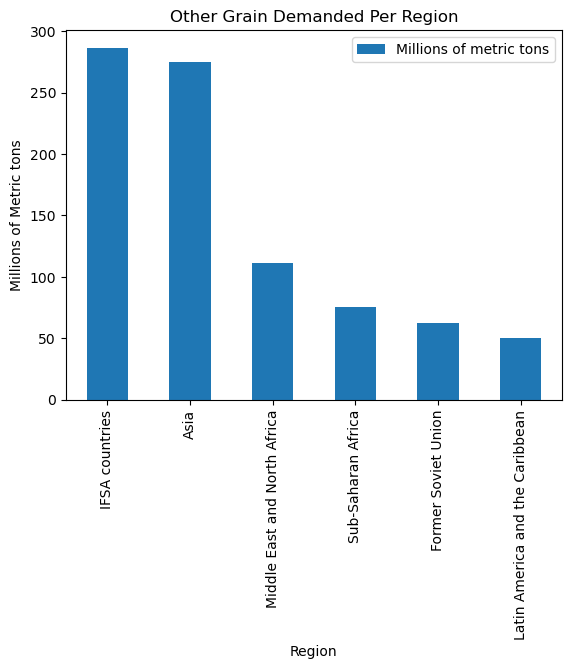

In [17]:
#visualising other types of grain demanded by demand
mask_other.plot(y="Millions of metric tons", kind="bar")

plt.title("Other Grain Demanded Per Region")

plt.xlabel("Region")

plt.ylabel("Millions of Metric tons")

In [19]:
# implied additional demanded grain 
implied_grain_demand_df= grain_df["Element"].str.contains("Implied") & (grain_df["Year"]==2024)

mask_implied= grain_df[implied_grain_demand_df]

mask_implied= mask_implied.groupby("Region").sum ().sort_values(by= "Millions of metric tons", ascending=False)

mask_implied.head()


,Element,Sub-region,Year,Millions of metric tons
Region,,,,
IFSA countries,Implied additional supply required,"IFSA countries, Total",2024,204.6
Middle East and North Africa,Implied additional supply requiredImplied addi...,Middle EastNorth AfricaMiddle East and North A...,6072,147.4
Asia,Implied additional supply requiredImplied addi...,"East AsiaSouth AsiaSouth East AsiaAsia, Total",8096,137.9
Sub-Saharan Africa,Implied additional supply requiredImplied addi...,Central AfricaEast AfricaSouthern AfricaWest A...,10120,123.1
Latin America and the Caribbean,Implied additional supply requiredImplied addi...,CaribbeanCentral AmericaSouth AmericaLatin Ame...,8096,67.3


In [20]:
# Grain produced in the various regions 
grain_produced_df= grain_df["Element"].str.contains("production") & (grain_df["Year"]==2024)

mask_produced= grain_df[grain_produced_df]

mask_produced= mask_produced.groupby("Region").sum ().sort_values(by= "Millions of metric tons", ascending=False)

mask_produced.head()


,Element,Sub-region,Year,Millions of metric tons
Region,,,,
Asia,Grain productionGrain productionGrain producti...,"East AsiaSouth AsiaSouth East AsiaAsia, Total",8096,1146.6
IFSA countries,Grain production,"IFSA countries, Total",2024,882.1
Sub-Saharan Africa,Grain productionGrain productionGrain producti...,Central AfricaEast AfricaSouthern AfricaWest A...,10120,290.7
Former Soviet Union,Grain productionGrain production,"Former Soviet UnionFormer Soviet Union, Total",4048,169.2
Middle East and North Africa,Grain productionGrain productionGrain production,Middle EastNorth AfricaMiddle East and North A...,6072,122.4


In [35]:
# combining the various masked dataframes

combined_df= pd.concat([food_grain_mask, mask_other["Millions of metric tons"], mask_implied["Millions of metric tons"],mask_produced["Millions of metric tons"]], axis=1)

combined_df= combined_df.drop(["Year"], axis=1)

#renaming the added columns by order           
combined_df.columns=['Element',
    'Sub-region',
    'Food Grain Demand',
    'Other Grain Demand',
    'Implied Grain Demand',
    'Produced Grain'
                    ]

combined_df

,Element,Sub-region,Food Grain Demand,Other Grain Demand,Implied Grain Demand,Produced Grain
Region,,,,,,
Asia,Food grain demandFood grain demandFood grain d...,"East AsiaSouth AsiaSouth East AsiaAsia, Total",1009.2,275.2,137.9,1146.6
IFSA countries,Food grain demand,"IFSA countries, Total",800.2,286.6,204.6,882.1
Sub-Saharan Africa,Food grain demandFood grain demandFood grain d...,Central AfricaEast AfricaSouthern AfricaWest A...,338.5,75.6,123.1,290.7
Middle East and North Africa,Food grain demandFood grain demandFood grain d...,Middle EastNorth AfricaMiddle East and North A...,158.7,111.0,147.4,122.4
Latin America and the Caribbean,Food grain demandFood grain demandFood grain d...,CaribbeanCentral AmericaSouth AmericaLatin Ame...,52.4,50.2,67.3,35.2
Former Soviet Union,Food grain demandFood grain demand,"Former Soviet UnionFormer Soviet Union, Total",41.6,62.2,-65.2,169.2


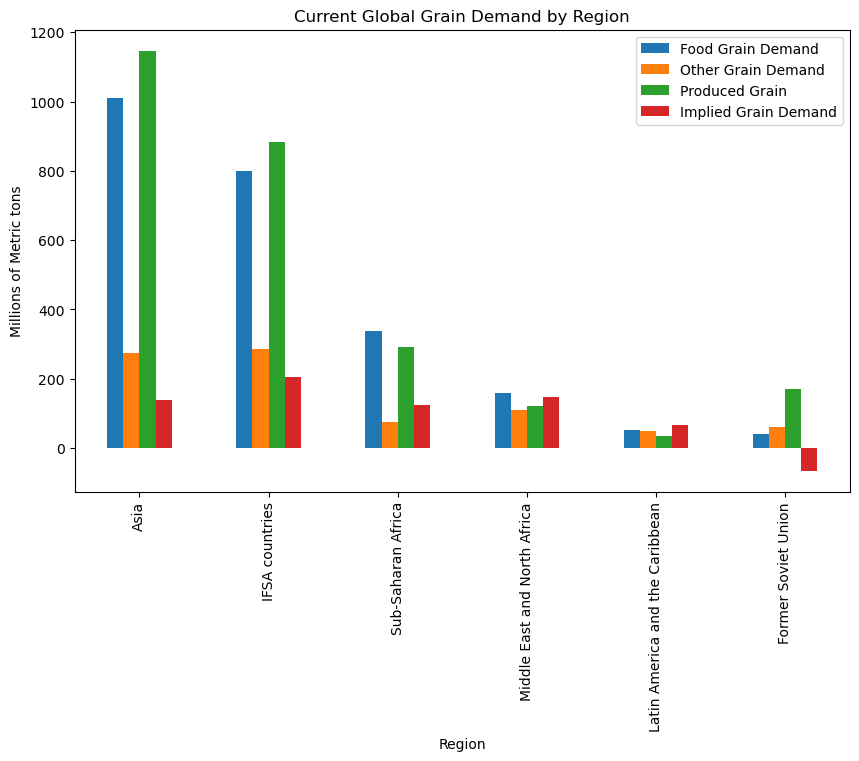

In [38]:
#Visualising the information in form of a stacked column chart

combined_df.plot(y=["Food Grain Demand", "Other Grain Demand", "Produced Grain", "Implied Grain Demand"], kind="bar", figsize=(10,6))

plt.xlabel("Region")
plt.ylabel("Millions of Metric tons")
plt.title("Current Global Grain Demand by Region")
plt.show()